In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [3]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')
MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')


EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')


In [4]:
y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)


IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)


MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [5]:
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)



In [6]:
EC_Earth3_CNN

<xarray.DataArray 'yLR' (time: 2170)>
array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2014-12-31T12:00:00

In [7]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

In [8]:
ts=getSeasonalCycle(y)
#print(ts)
ts1=ts.roll(dayofyear=32)
#print(ts1)
#print(ts1.dayofyear)
#print(ts.dayofyear)
ts1
ts1[(ts1.dayofyear<366) | (ts1.dayofyear>366)]

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'fogdata' (dayofyear: 62)>
array([0.        , 0.05128205, 0.02564103, 0.05128205, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.12820513, 0.12820513,
       0.1025641 , 0.17948718, 0.15384615, 0.12820513, 0.15384615,
       0.15384615, 0.23076923, 0.25641026, 0.25641026, 0.23076923,
       0.25641026, 0.17948718, 0.28205128, 0.38461538, 0.33333333,
       0.30769231, 0.35897436, 0.43589744, 0.38461538, 0.43589744,
       0.46153846, 0.41025641, 0.43589744, 0.43589744, 0.48717949,
       0.35897436, 0.41025641, 0.53846154, 0.41025641, 0.46153846,
       0.33333333, 0.23076923, 0.35897436, 0.28205128, 0.35897436,
       0.23076923, 0.15384615, 0.25641026, 0.25641026, 0.30769231,
       0.23076923, 0.20512821, 0.17948718, 0.17948718, 0.17948718,
       0.23076923, 0.15384615, 0.15384615, 0.15384615, 0.1025641 ,
       0.1025641 , 0.05128205])
Coordinates:
  * dayofyear  (dayofyear) int64 335 336 337 338 339 340 ... 26 27 28 29 30 31

In [9]:
x=(32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

0.03846154


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


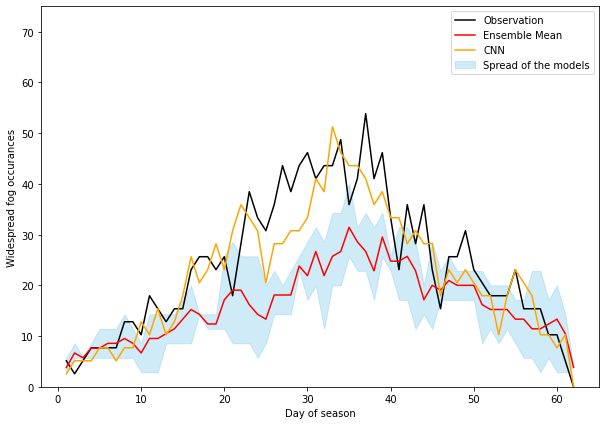

OKK
3.809524
6.666667
5.714286
7.619048
7.619048
8.571429
8.571429
9.523809
8.571429
6.666667
9.523809
9.523809
10.476191
11.428572
13.333334
15.238096
14.285715
12.380953
12.380953
17.142859
19.047619
19.047619
16.190477
14.285715
13.333334
18.095238
18.095238
18.095238
23.809525
21.904762
26.666668
21.904762
25.714287
26.666668
31.428572
28.57143
26.666668
22.857143
29.523811
24.761908
24.761908
25.714287
22.857143
17.142859
20.0
19.047619
20.952381
20.0
20.0
20.0
16.190477
15.238096
15.238096
15.238096
13.333334
13.333334
11.428572
11.428572
12.380953
13.333334
10.476191
3.846154
[0.03809524 0.06666667 0.05714286 0.07619048 0.07619048 0.08571429
 0.08571429 0.0952381  0.08571429 0.06666667 0.0952381  0.0952381
 0.10476191 0.11428571 0.13333334 0.15238096 0.14285715 0.12380952
 0.12380952 0.17142858 0.1904762  0.1904762  0.16190477 0.14285715
 0.13333334 0.18095239 0.18095239 0.18095239 0.23809524 0.21904762
 0.26666668 0.21904762 0.25714287 0.26666668 0.31428573 0.2857143
 0.2666666

In [10]:
fig = plt.figure(figsize=(10,7))
#fig = plt.figure(figsize=(10,5))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
OTs

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

fList=(ACCESS_CM2_CNN,IPSL_CM6A_LR_CNN, EC_Earth3_CNN)

for fL in fList:
    ts1=getSeasonalCycle(fL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    
    
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

x=np.arange(1,63)


plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs*100.0,label='Observation', color='black')
plt.plot(x,meanMS*100.0,label='Ensemble Mean', color='red')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')
plt.ylim([0.00, 75])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread fog occurances')     
plt.legend()

plt.savefig('Best3_Historical_WFD_SC_ModelsSpread.eps')
plt.show()

print('OKK')
print('\n'.join(map(str, meanMS*100))) 

ensTs=OTs.copy()
ensTs.values=meanMS
#dump(ensTs,'../../April2021/Future_projection_plots/WFD_historical_ensembleMean_Best5.joblib')
#ensTs

#print(meanMS)
